In [1]:
# Primeiro, você precisará instalar a biblioteca wordcloud usando o gerenciador de pacotes pip
!pip install wordcloud

In [26]:
pip install nltk

In [27]:
# Depois, importe a biblioteca e os outros módulos necessários
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otimi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
import string, re
import pandas as pd
import datetime
import mysql.connector

In [6]:
conexao = mysql.connector.connect(host='localhost',user='root',password='',database='producao')
cursor = conexao.cursor()

In [31]:
# ver livro Mineração de texto em humanidades de Hélio Guerra, Lisboa: Universidade de Lisboa
def remover_stopwords(text):
    stop_words = set(stopwords.words('portuguese'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words = ' '.join(filtered_words) # converter para string
    return filtered_words

def remover_pontuacao(texto):
    lista_sinais_pontuacao = ['!','"','#','$','%','&',"'",'(',')','*','+',',','.','/'  \
                              ':',';','<','=','>','?','@','[','\\',']','^','_','{','|' \
                              '}','~','«','»']
    pontuacao = ''.join(lista_sinais_pontuacao)
    texto_alterado = re.sub("["+pontuacao+"]", " ",texto)
    texto_alterado.replace('  ',' ')
    return texto_alterado

#def remover_stopwords(texto):
#    lista_stopwords = [' a ',' e ',' da ',' de ',' do ',' das ',' dos ',' para ',' um ',' uma ',' com ',' em ',' ou ',' o '  \
#                              ' por ',' que ',' quais ',' mas ',' sem ',' no ',' na ',' sim ',' não ',' à ',' às ',' porque ',' seu ',' sua ' \
#                              ' para ',' pelo ',' pela ',' é ']
#    stopwords = ''.join(lista_stopwords)
#    texto_alterado = re.sub("["+stopwords+"]", " ",texto)
#    texto_alterado.replace('  ',' ')
#    return texto_alterado

def remover_hifens(texto):
    texto_alterado=re.sub("([\n\W\s]-)|(-[\n\W\s])"," ",texto)
    texto_alterado.replace('  ',' ')
    return texto_alterado

def remover_algarismos(texto):
    texto_alterado=re.sub("[\d]+"," ",texto)
    texto_alterado.replace('  ',' ')
    return texto_alterado

def remover_caracteres(texto):
    texto_alterado = remover_pontuacao(texto)
    texto_alterado = remover_hifens(texto_alterado)
    texto_alterado = remover_algarismos(texto_alterado)
    return texto_alterado
    

In [29]:
def listar_palavras(texto, minusculas=True): #gera lista de palavras a partir de texto
    if minusculas:
        return texto.lower().split()
    else:
        return texto.split()

def gerar_dicionario_chave_palavras(lista):
    dicionario={}
    for x in lista:
        if x in dicionario:
            dicionario[x]=dicionario[x]+1
        else:
            dicionario[x]=1
    return dicionario

def gerar_dicionario_chave_ocorrencias(lista):
    dic_base = gerar_dicionario_chave_palavras(lista)
    novo_dicionario={}
    for x in dic_base:
        if dic_base[x] not in novo_dicionario:
            novo_dicionario[dic_base[x]]=[x]
        else:
            novo_dicionario[dic_base[x]].append(x)
            novo_dicionario[dic_base[x]].sort()
    return novo_dicionario
            

112021001422 - INSTALAÇÃO PARA GERAR ENERGIA MECÂNICA COM O USO DE UM CICLO DE POTÊNCIA COMBINADO 
112021001936 - MÉTODO DE PRODUÇÃO DE AREIA CERÂMICA LEVE SINTÉTICA E USOS DO MESMO 
112021002077 - COMBINAÇÕES DE INSETICIDAS INOVADORAS 
112021004644 - MÁQUINA DE LIMPEZA DE BALASTRO PARA OPERAÇÃO DE LIMPEZA DE ENCOSTAS LATERAIS E MÉTODO DE OPERAÇÃO EM ENCOSTAS LATERAIS QUE ADOTA A MÁQUINA DE LIMPEZA DE BALASTRO PARA OPERAÇÃO DE LIMPEZA DE ENCOSTAS LATERAIS
112021009547 - DISPOSITIVO DE ENTREGA DE AEROSOL 
112021013649 - REVESTIMENTO, MATERIAL PARA TELHADO, E, MÉTODO PARA PREPARAR UM MATERIAL PARA TELHADO 
112021013900 - CAMISA DE CILINDRO PARA FUNDIÇÃO DE INSERÇÃO 
112021015673 - SISTEMA DE FRIGOBAR INTELIGENTE E RESPECTIVO MÉTODO
112021018405 - MÉTODO PARA RECUPERAR UMA PLATAFORMA MÓVEL DE DENTRO DE UM TANQUE QUE POSSUI UMA ESCOTILHA E PELO MENOS PARCIALMENTE PREENCHIDO COM UMA SUBSTÂNCIA ENERGÉTICA
112021018981 - COMPOSIÇÕES ANTIVIRAIS E ANTIMICROBIANAS COM BASE EM PRATA, MATERIAIS TÊ

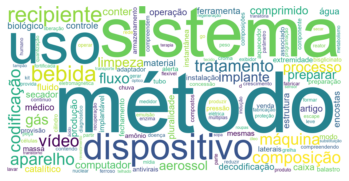

{'método': 33, 'sistema': 18, 'composição': 10, 'tratamento': 9, 'vídeo': 9, 'métodos': 8, 'uso': 8, 'aparelho': 6, 'codificação': 6, 'dispositivo': 6, 'máquina': 6, 'processo': 6, 'fluxo': 5, 'gás': 5, 'implante': 5, 'limpeza': 5, 'preparar': 5, 'aerossol': 4, 'comprimido': 4, 'computador': 4, 'conter': 4, 'decodificação': 4, 'ferramenta': 4, 'fluido': 4, 'material': 4, 'médico': 4, 'operação': 4, 'pluralidade': 4, 'produção': 4, 'recipientes': 4, 'secador': 4, 'água': 4, 'artigo': 3, 'bebidas': 3, 'biológico': 3, 'caixa': 3, 'catalítico': 3, 'controle': 3, 'dispositivos': 3, 'encostas': 3, 'estrutura': 3, 'extremidade': 3, 'fechamento': 3, 'implantável': 3, 'instalação': 3, 'instantânea': 3, 'laterais': 3, 'massa': 3, 'mesmas': 3, 'modo': 3, 'preparação': 3, 'pressão': 3, 'provisão': 3, 'recipiente': 3, 'sistemas': 3, 'tubo': 3, 'venda': 3, 'adaptador': 2, 'alerta': 2, 'amônio': 2, 'antivirais': 2, 'aquecedor': 2, 'armazenamento': 2, 'associado': 2, 'balastro': 2, 'bebida': 2, 'bisgl

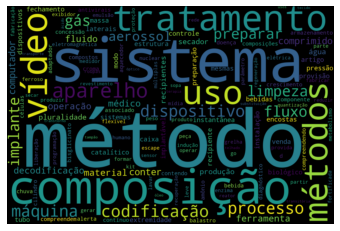

In [62]:
total = 0
texto = ""
comando = f"SELECT t2.numero,t1.titulo FROM titulo t1 JOIN arquivadosxml t2 ON t1.numero = t2.numero WHERE t2.data BETWEEN '2022-01-01' AND '2022-01-31';"
cursor.execute(comando)
resultado = cursor.fetchall()
#print(len(resultado))
for row in resultado:
    numero = row[0]
    titulo = row[1]
    texto = texto + " " + titulo
    print(numero + " - " + titulo)
    total = total + 1
    if total>100:
        break
        
texto = remover_caracteres(texto)
texto = remover_stopwords(texto)
lista = listar_palavras(texto)

dic1 = gerar_dicionario_chave_palavras(lista)
for palavra in sorted(dic1,key=str.lower):
    print(str(palavra)+"..."+str(dic1[palavra]))

ordem = 1
nuvem = ''
word_counts = {}
dic2 = gerar_dicionario_chave_ocorrencias(lista)
for item in sorted(dic2,reverse=True):
    #print(str(ordem)+" "+str(item)+" = "+str(dic2[item]))
    if ordem<=10:
        nuvem = nuvem + ' ' + ' '.join(dic2[item])
        print("len="+str(len(dic2[item])))
        for x in dic2[item]:
            print(x)
            word_counts[x]=item
    ordem = ordem + 1

print(nuvem)
wordcloud = WordCloud(background_color='white', font_path='arial.ttf', width=1600, height=800).generate(nuvem)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(word_counts)
wordcloud = WordCloud(width=1200, height=800).generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



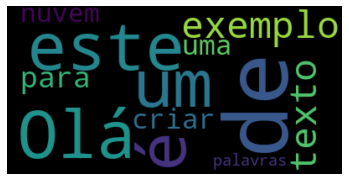

In [3]:
# Em seguida, crie uma string com o texto da qual você deseja criar a nuvem de palavras
text = "Olá, este é um exemplo de texto para criar uma nuvem de palavras"

# Crie uma instância da classe WordCloud usando o texto como argumento
wordcloud = WordCloud().generate(text)

# Mostre a nuvem de palavras usando matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

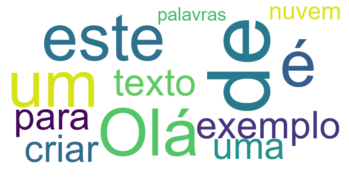

In [4]:
# Crie uma instância da classe WordCloud com alguns parâmetros de configuração
wordcloud = WordCloud(background_color='white', font_path='arial.ttf', width=800, height=400).generate(text)

# Mostre a nuvem de palavras como antes
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

{'cat': 10, 'dog': 15, 'fish': 5}


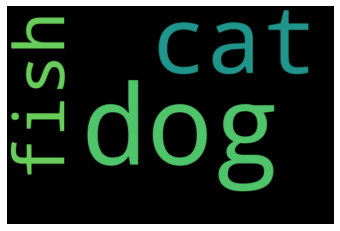

In [57]:
words = [('cat', 10), ('dog', 15), ('fish', 5)] # gera lista de tuplas []
word_counts = dict(words) # converte em dicionário {}
print(word_counts)
# Crie a nuvem de palavras a partir do dicionário
wordcloud = WordCloud(width=600, height=400).generate_from_frequencies(word_counts)
# Exiba a nuvem de palavras usando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()